In [1]:
import os
os.environ["KMP_WARNINGS"] = "off"
import warnings
warnings.filterwarnings("ignore")

In [2]:
from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [3]:
common_config.figure_journal_basic()

In [4]:
import pertpy as pt
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np

In [30]:
adata = sc.read_h5ad("data/norman_preprocessed.h5ad")

# Apply Mixscape

In [31]:
ms_pt = pt.tl.Mixscape()

In [32]:
ms_pt.perturbation_signature(adata, pert_key="perturbation_name", control="control")

In [33]:
adata_pert = adata.copy()
adata_pert

AnnData object with n_obs × n_vars = 111255 × 4000
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'gemgroup', 'good_coverage', 'number_of_cells', 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_FOXF1', 'guide_FOXL2', 'guide_FOXO4', 'guide_GLB1L2', 'guide_HES7', 'guide_HK2', 'guide_HNF4A', 'guide_HOXA13', 'guide_HOXB9', 'guide_HOXC13', 'guide_IER5L', 'guide_IGDCC3', 'guide_IKZF3', 'guide_IRF1', 'guide_ISL2', 'guide_JUN', 'guide_KIAA1804', 'guide_KIF18B', 'guide_KIF2C', 'g

In [34]:
adata_pert.X = adata_pert.layers["X_pert"]

In [35]:
sc.pp.pca(adata_pert)

In [36]:
sc.pp.neighbors(adata_pert, metric="cosine")

In [37]:
sc.tl.umap(adata_pert)

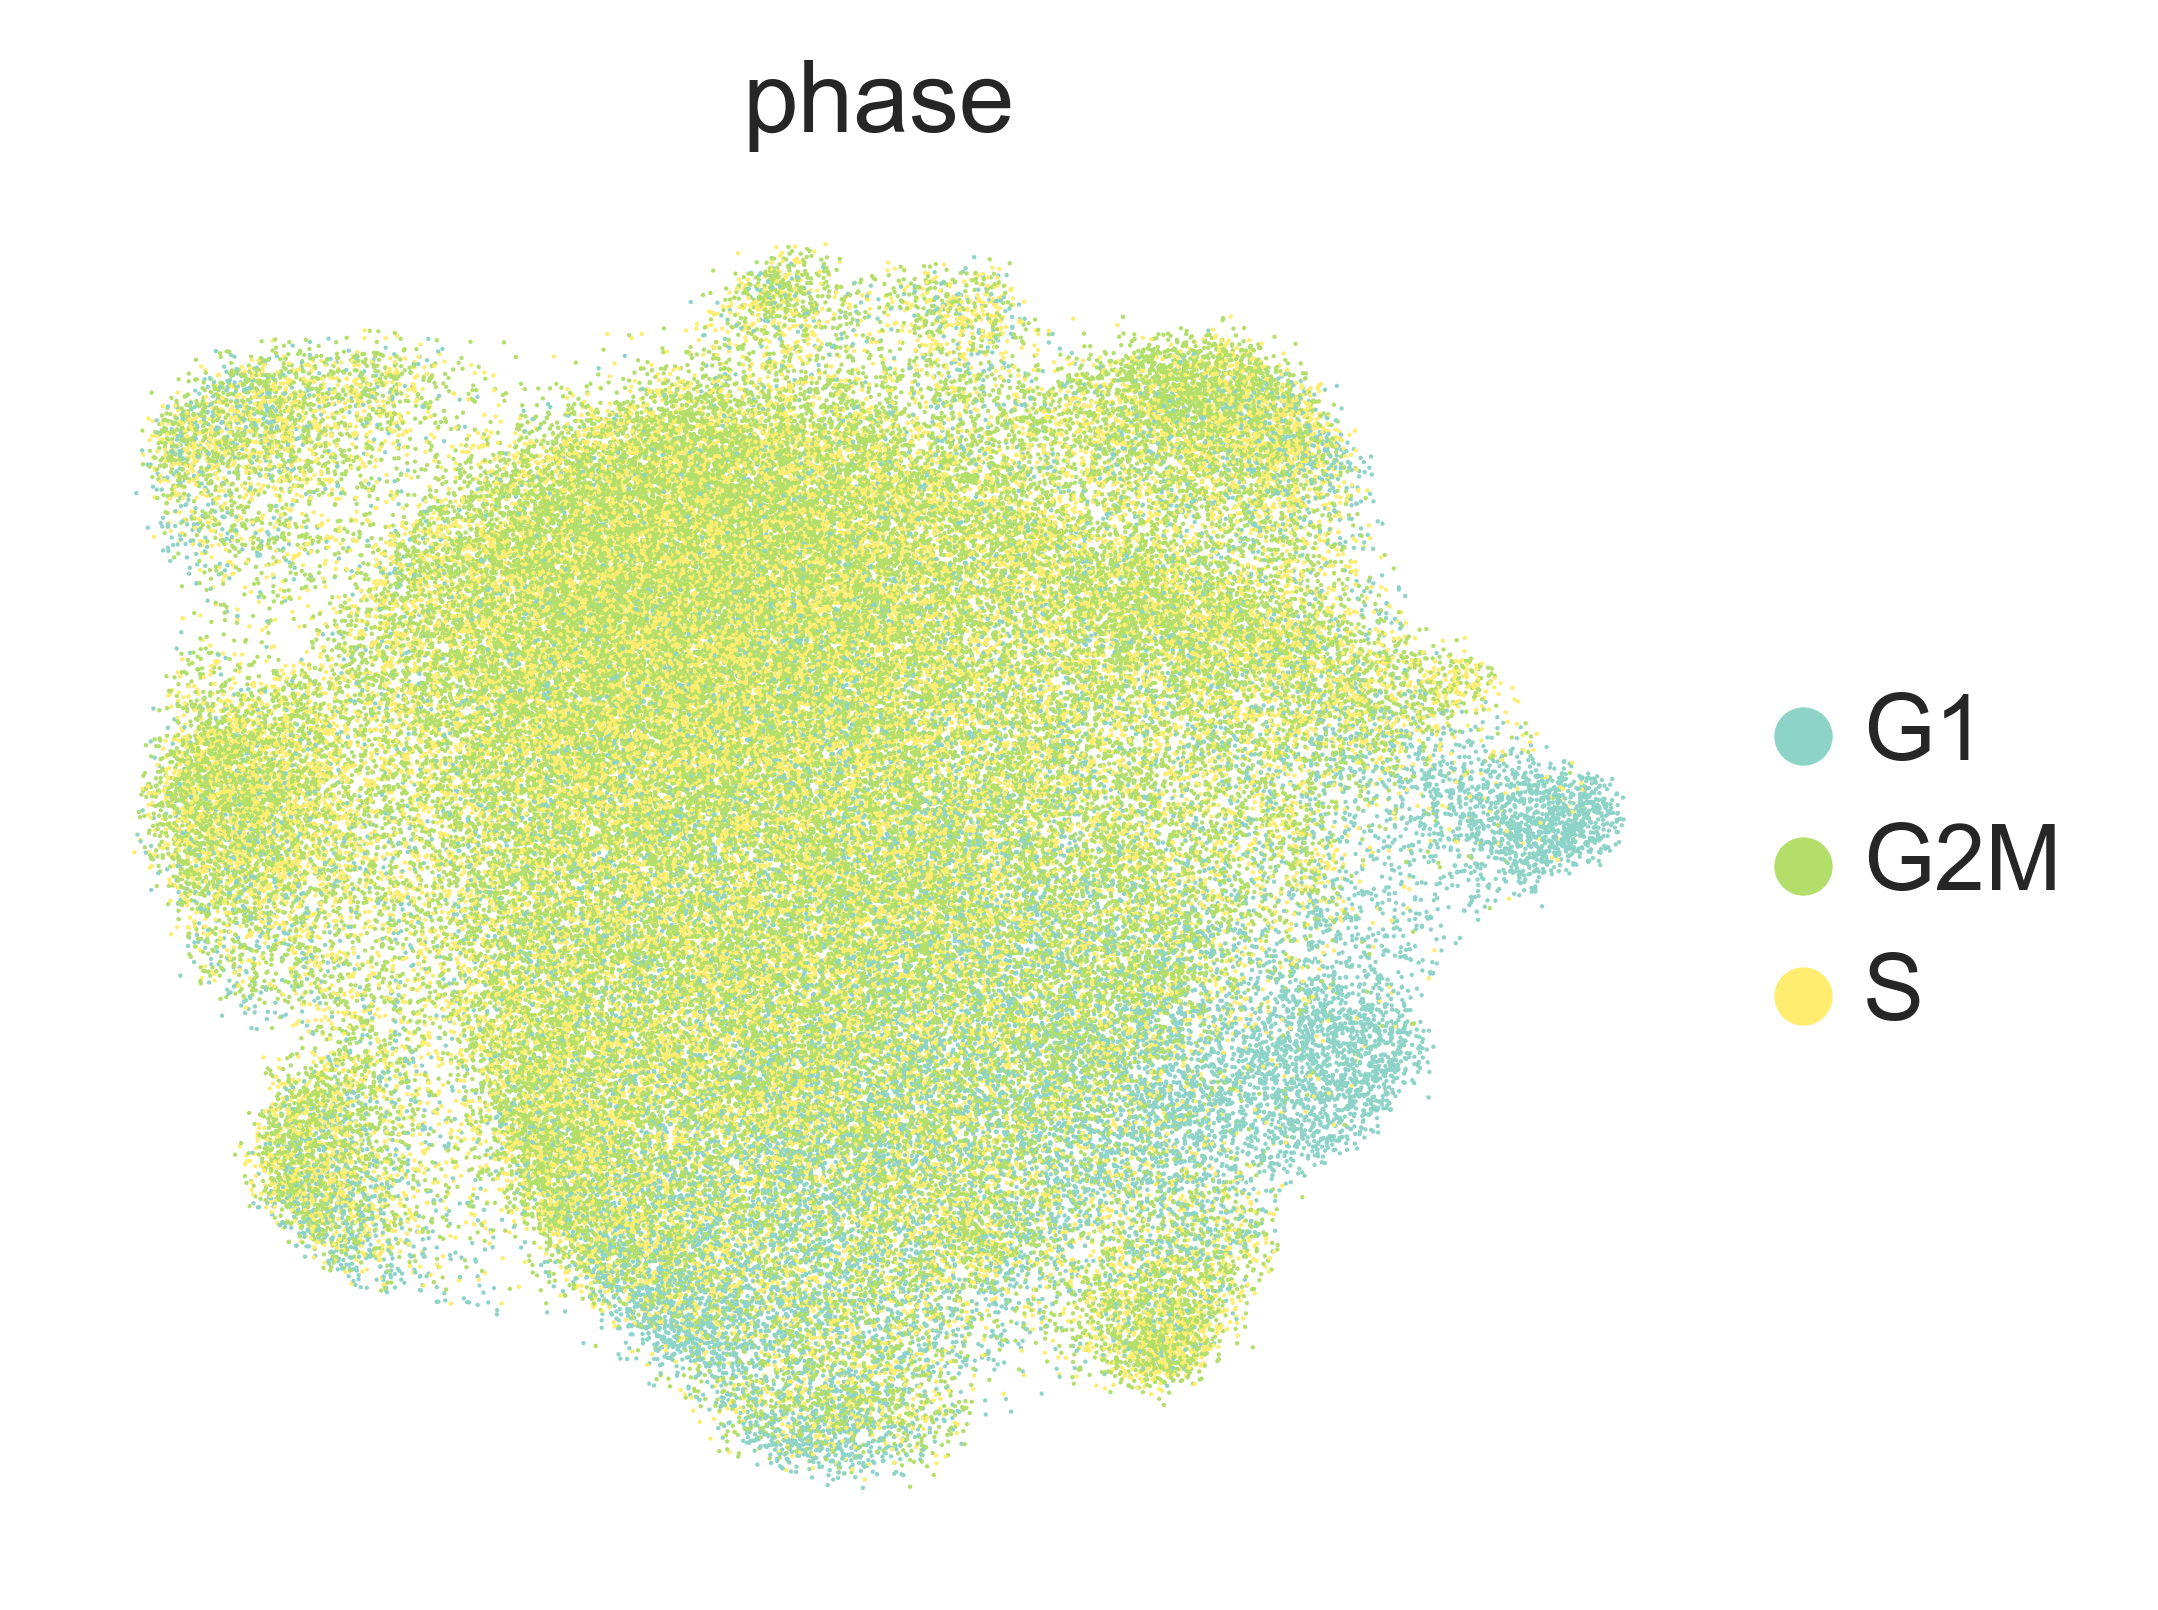

In [38]:
sc.pl.umap(adata_pert, color="phase", palette="Set3", show=False)
plt.savefig("figures/phase_mixscape_corrected_umap.png", bbox_inches="tight")

In [39]:
adata.obs["guide_ids"] = adata.obs["guide_ids"].cat.rename_categories({"": "control"})

In [40]:
ms_pt.mixscape(adata=adata, control="control", labels="guide_ids", layer="X_pert")

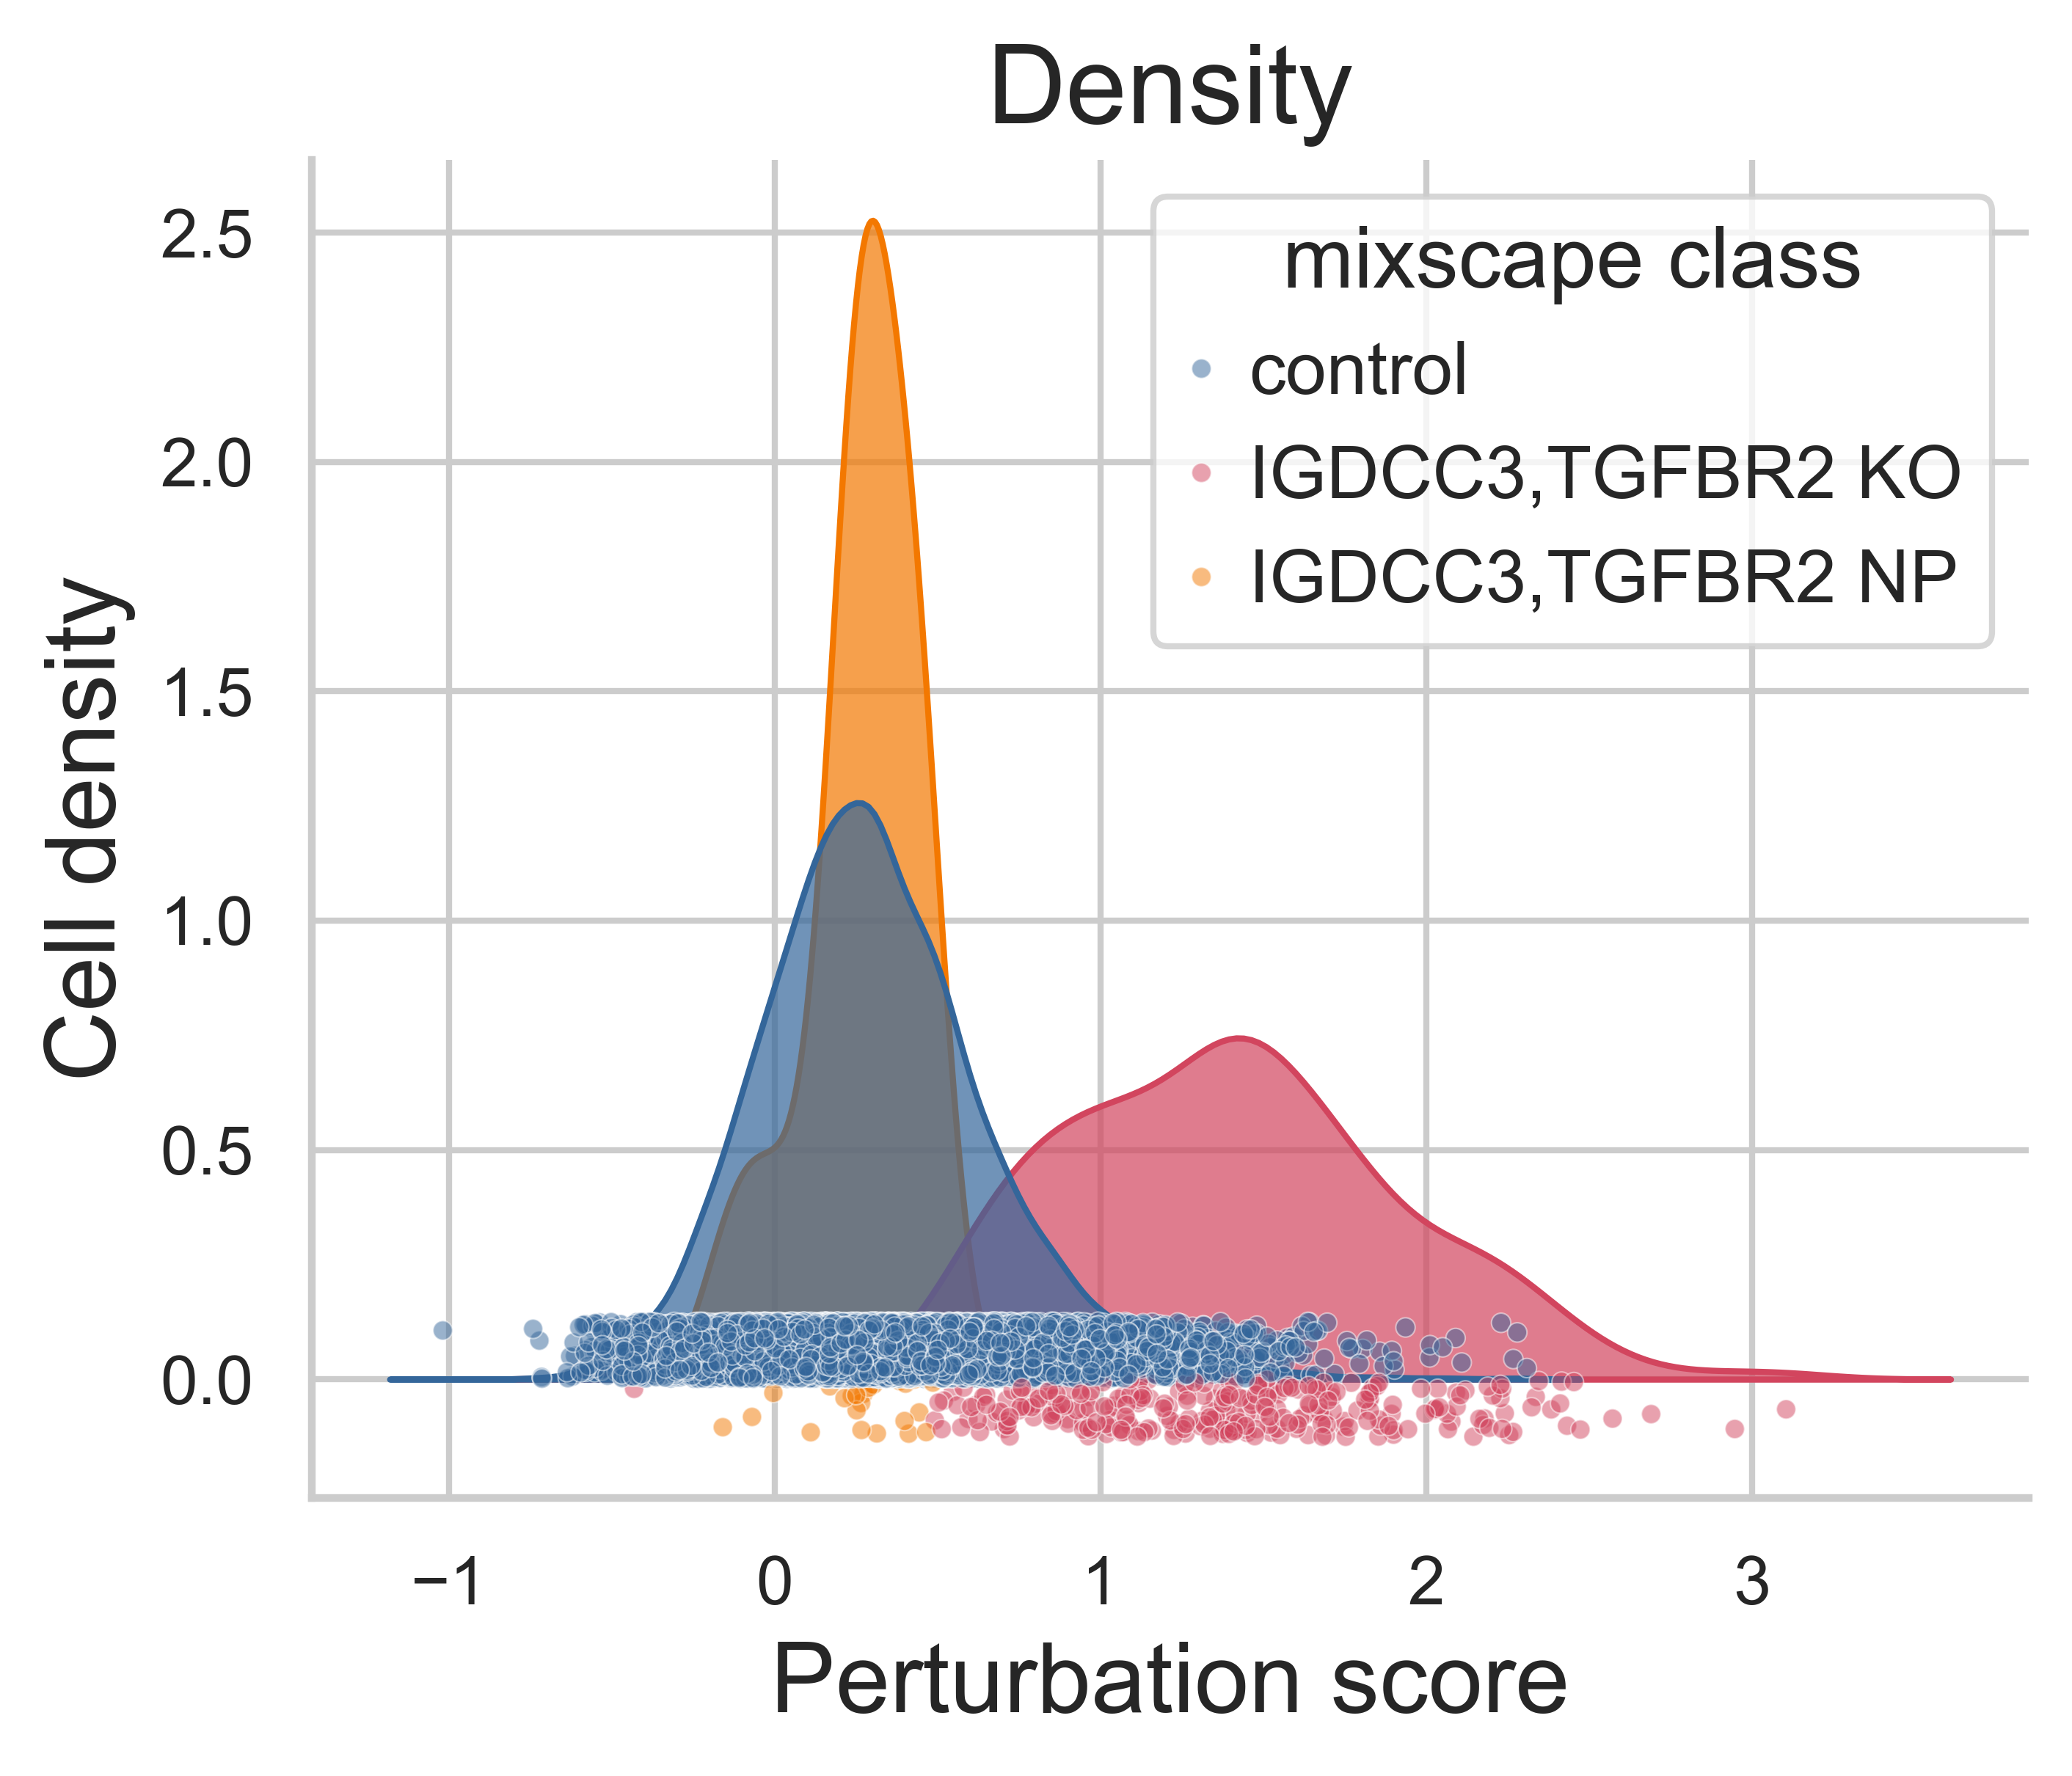

In [43]:
plt.rcParams["figure.figsize"] = (5, 4)
ms_pt.plot_perturbscore(
    adata=adata,
    labels="guide_ids",
    target_gene="IGDCC3,TGFBR2",
    palette={
        "control": common_config.pt_blue,
        "IGDCC3,TGFBR2 NP": common_config.pt_orange,
        "IGDCC3,TGFBR2 KO": common_config.pt_red,
    },
)
plt.savefig("figures/perturb_score_example.png", bbox_inches="tight")

In [44]:
adata.obs[
    [
        "guide_identity",
        "guide_ids",
        "mixscape_class_p_ko",
        "mixscape_class",
        "mixscape_class_global",
    ]
]

guide_identity      guide_ids  \
index                                                                       
AAACCTGAGAAGAAGC-1    NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0        control   
AAACCTGAGGCATGTG-1      TSC22D1_NegCtrl0__TSC22D1_NegCtrl0        TSC22D1   
AAACCTGAGGCCCTTG-1                KLF1_MAP2K6__KLF1_MAP2K6    KLF1,MAP2K6   
AAACCTGCACGAAGCA-1  NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0        control   
AAACCTGCAGACGTAG-1            CEBPE_RUNX1T1__CEBPE_RUNX1T1  CEBPE,RUNX1T1   
...                                                    ...            ...   
TTTGTCATCAGTACGT-8          FOXA3_NegCtrl0__FOXA3_NegCtrl0          FOXA3   
TTTGTCATCCACTCCA-8          CELF2_NegCtrl0__CELF2_NegCtrl0          CELF2   
TTTGTCATCCCAACGG-8        BCORL1_NegCtrl0__BCORL1_NegCtrl0         BCORL1   
TTTGTCATCCTCCTAG-8            ZBTB10_PTPN12__ZBTB10_PTPN12  PTPN12,ZBTB10   
TTTGTCATCTGGCGAC-8        MAP4K3_NegCtrl0__MAP4K3_NegCtrl0         MAP4K3   

                    mixscape_class_p_ko    mixscape_class  \
index                                                       
AAACCTGAGAAGAAGC-1             0.000000           control   
AAACCTGAGGCATGTG-1             0.830916        TSC22D1 KO   
AAACCTGAGGCCCTTG-1             0.800702    KLF1,MAP2K6 KO   
AAACCTGCACGAAGCA-1             0.000000           control   
AAACCTGCAGACGTAG-1             0.998198  CEBPE,RUNX1T1 KO   
...                                 ...               ...   
TTTGTCATCAGTACGT-8             0.995569          FOXA3 KO   
TTTGTCATCCACTCCA-8             0.640408          CELF2 KO   
TTTGTCATCCCAACGG-8             0.996394         BCORL1 KO   
TTTGTCATCCTCCTAG-8             0.255150  PTPN12,ZBTB10 NP   
TTTGTCATCTGGCGAC-8             0.991063         MAP4K3 KO   

                   mixscape_class_global  
index                                     
AAACCTGAGAAGAAGC-1               control  
AAACCTGAGGCATGTG-1                    KO  
AAACCTGAGGCCCTTG-1                    KO  
AAACCTGCACGAAGCA-1               control  
AAACCTGCAGACGTAG-1                    KO  
...                                  ...  
TTTGTCATCAGTACGT-8                    KO  
TTTGTCATCCACTCCA-8                    KO  
TTTGTCATCCCAACGG-8                    KO  
TTTGTCATCCTCCTAG-8                    NP  
TTTGTCATCTGGCGAC-8                    KO  

[111255 rows x 5 columns]

In [51]:
adata_pert.obs["mixscape_class_global"] = adata.obs["mixscape_class_global"]
sc.pl.umap(
    adata_pert,
    color="mixscape_class_global",
    palette={
        "control": common_config.pt_blue,
        "KO": common_config.pt_red,
        "NP": common_config.pt_orange,
    },
    title="Mixscape class",
    show=False
)
plt.savefig("figures/perturbation_status_mixscape_corrected_umap.png", bbox_inches="tight")

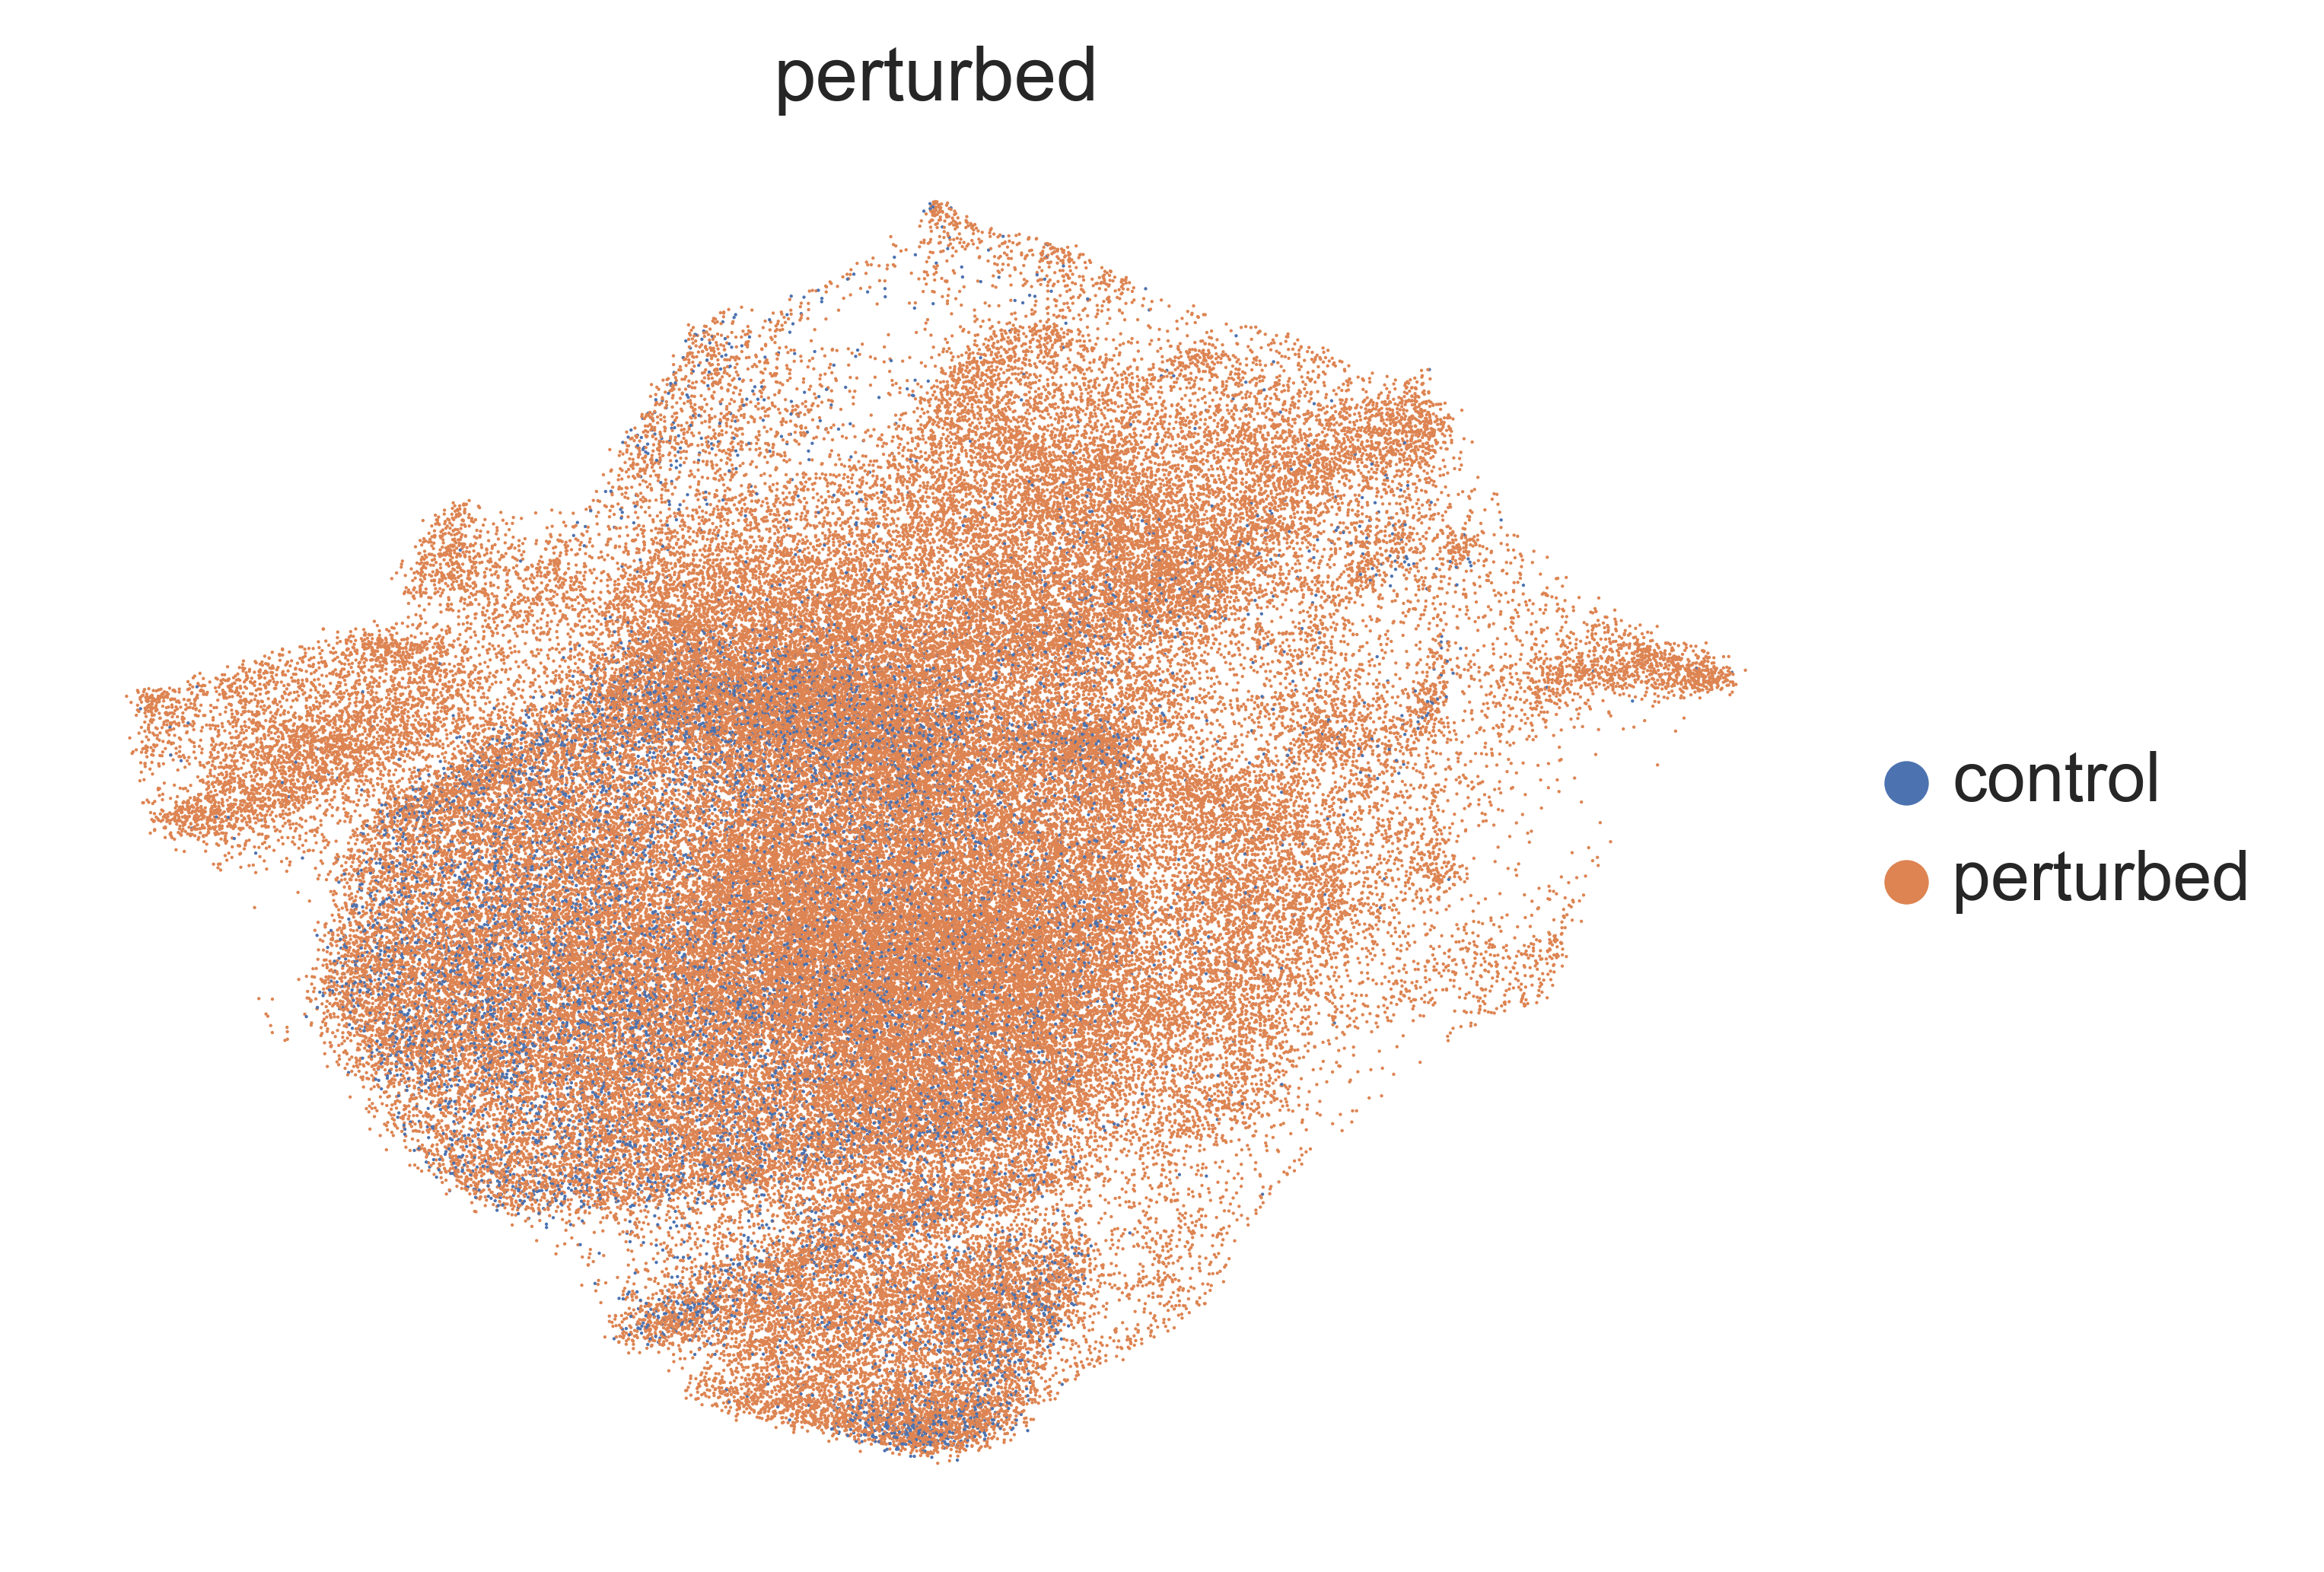

In [52]:
sc.pl.umap(adata, color=["perturbed"])

In [25]:
guide_means = adata.obs.groupby("guide_ids")["mixscape_class_p_ko"].mean()

guide_means_np = 1 - guide_means
plots_per_row = 7
num_plots = len(guide_means)
num_rows = np.ceil(num_plots / plots_per_row)
fig, axes = plt.subplots(
    nrows=int(num_rows), ncols=plots_per_row, figsize=(10, 2 * num_rows)
)
axes = axes.flatten()

for i, (guide_id, ko_ratio) in enumerate(guide_means.items()):
    np_ratio = guide_means_np[guide_id]
    axes[i].bar("Guide", ko_ratio, color=common_config.pt_red, label="KO")
    axes[i].bar(
        "Guide", np_ratio, bottom=ko_ratio, color=common_config.pt_blue, label="NP"
    )
    axes[i].set_title(guide_id)
    axes[i].set_ylim(0, 1)
    axes[i].set_ylabel("Ratio")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

handles, labels = axes[0].get_legend_handles_labels()
legend = fig.legend(
    handles,
    labels,
    loc="lower center",
    ncol=2,
    fontsize="large",
    bbox_to_anchor=(0.5, -0.01),
)

plt.subplots_adjust(bottom=0.2)

plt.tight_layout()
plt.savefig("figures/mixscape_ratio_barplot_umap.png", bbox_inches="tight", dpi=200)

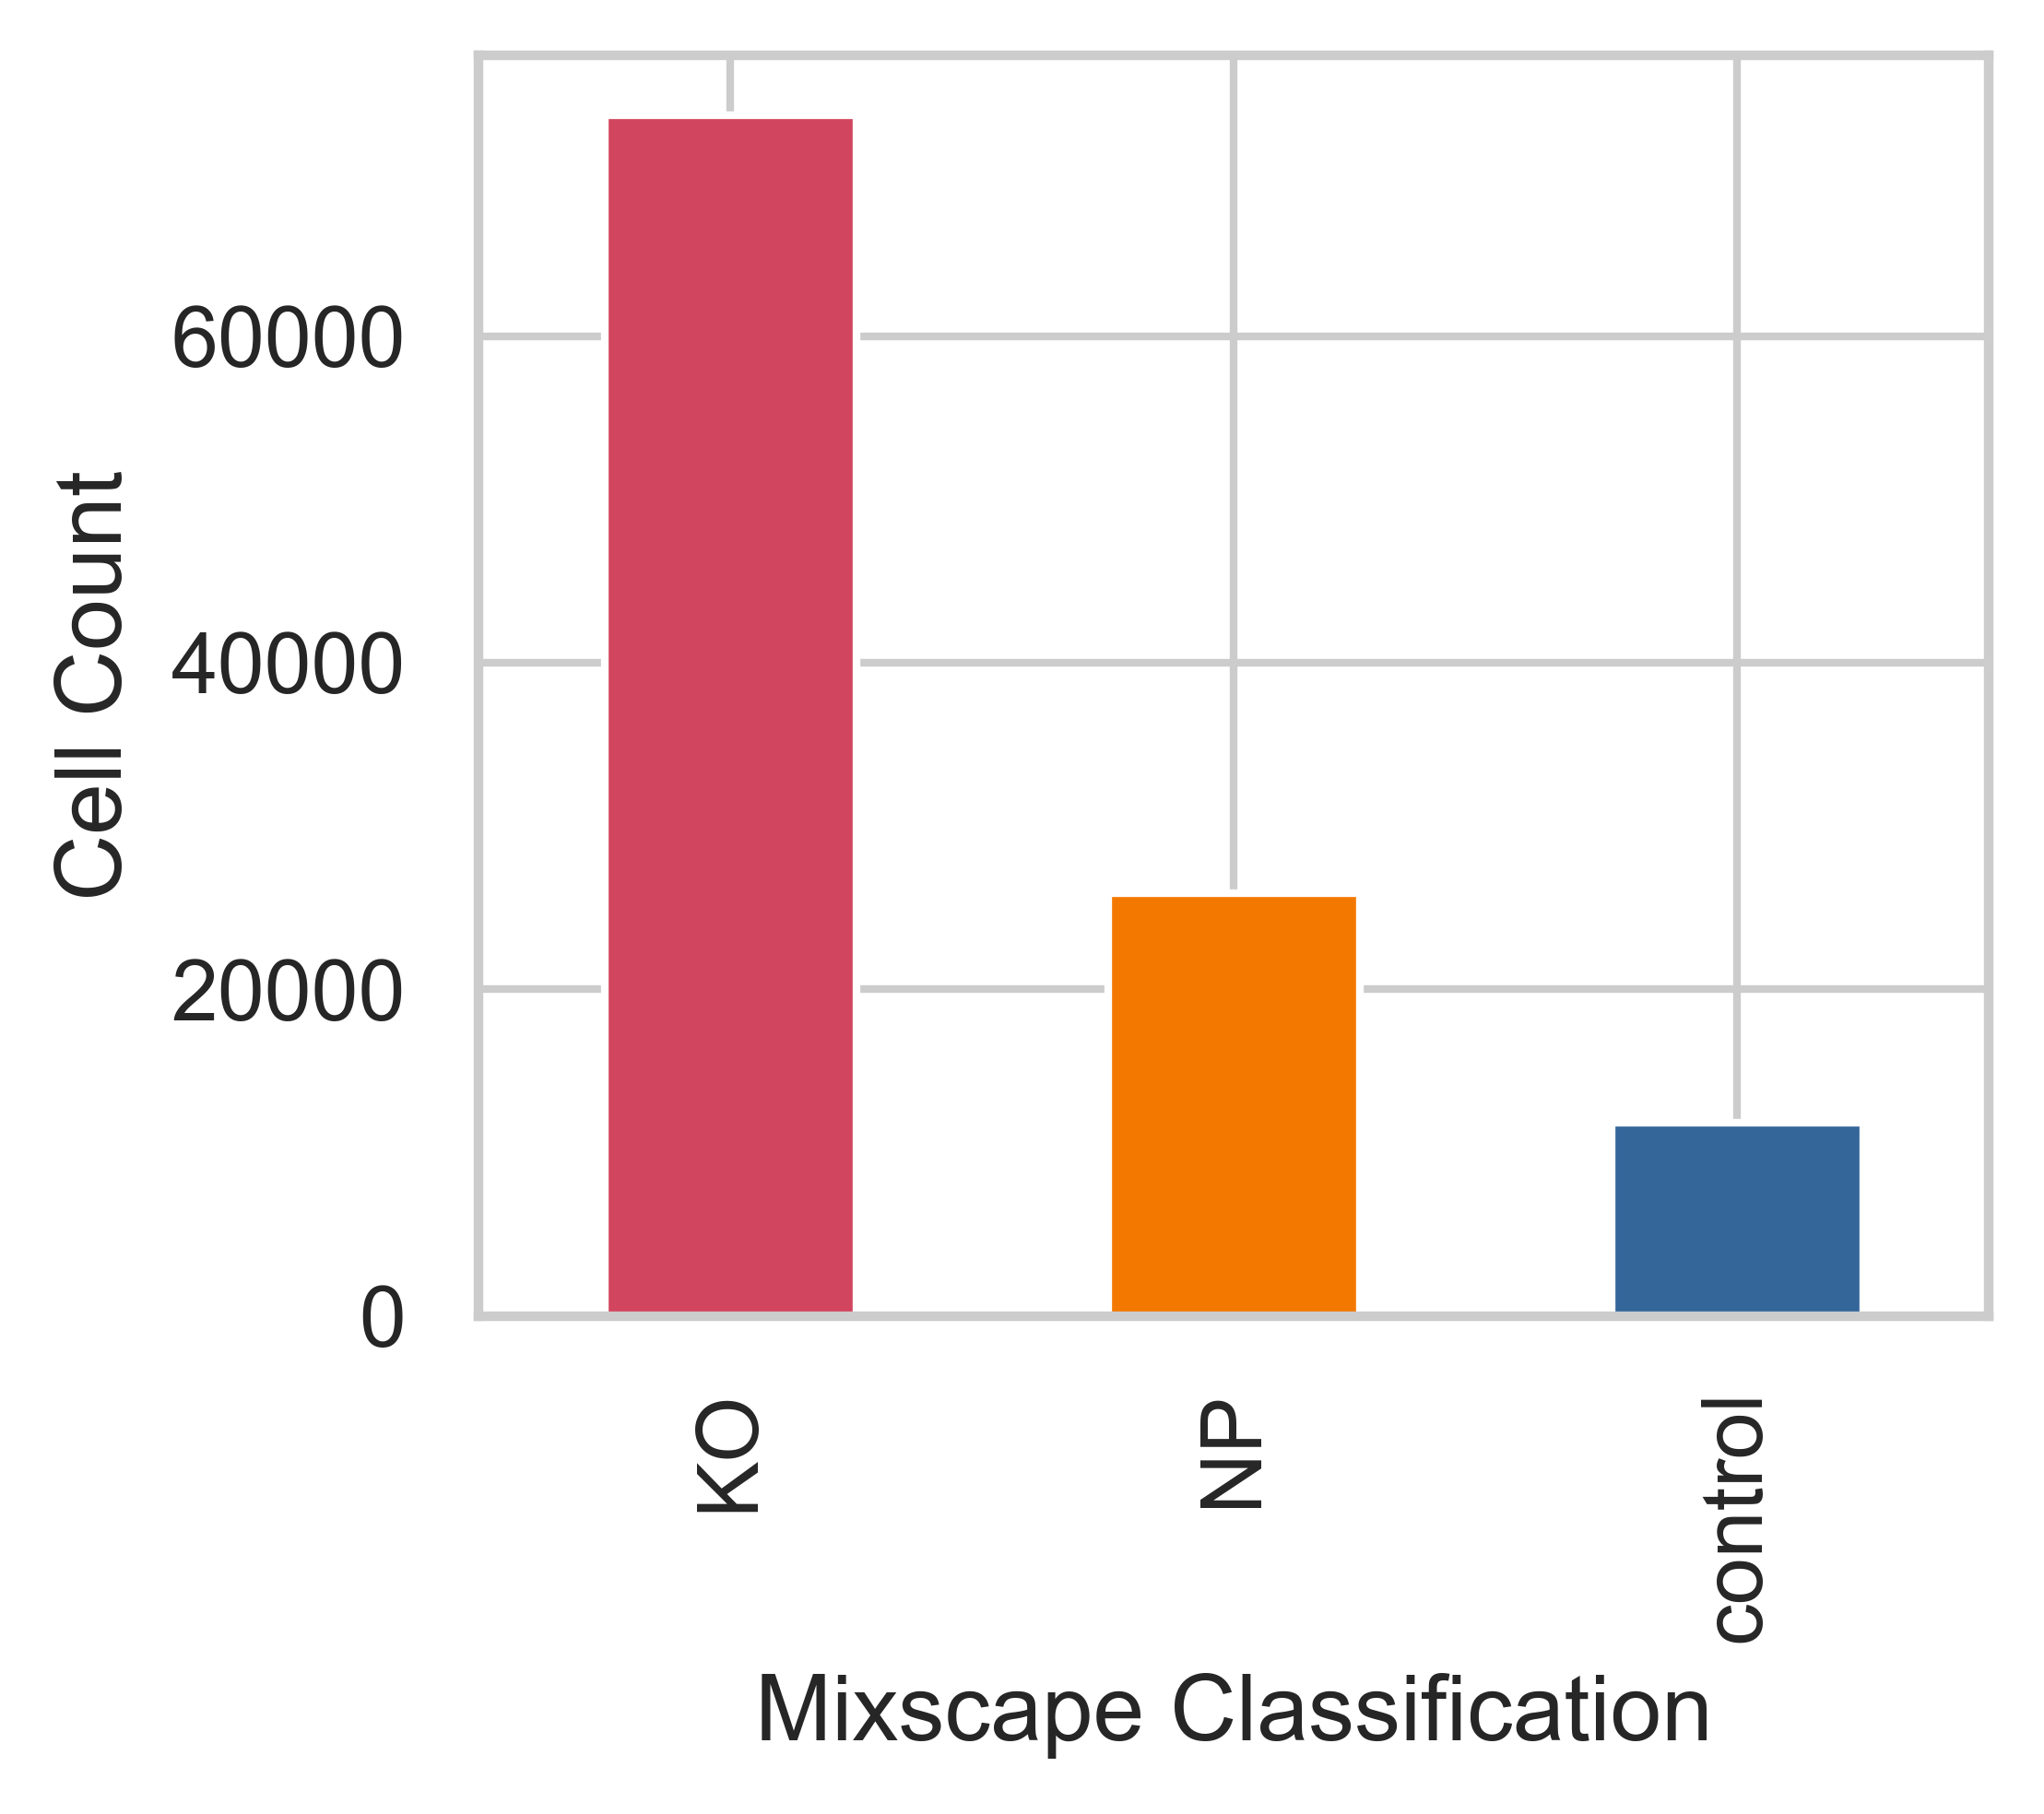

In [28]:
classification_counts = adata.obs["mixscape_class_global"].value_counts()


colors = {
    "control": common_config.pt_blue,
    "KO": common_config.pt_red,
    "NP": common_config.pt_orange,
}
plt.figure(figsize=(3.5, 3))
classification_counts.plot(
    kind="bar", color=[colors[class_] for class_ in classification_counts.index]
)
plt.xlabel("Mixscape Classification")
plt.ylabel("Cell Count")
plt.savefig("figures/corrected_summary_barplot.png", bbox_inches="tight")
plt.show()

In [ ]:
adata.obs["perturbed_cleaned"] = adata.obs.apply(
    lambda row: (
        "control" if row["mixscape_class_global"] == "NP" else row["perturbed"]
    ),
    axis=1,
).astype("category")

In [ ]:
pre_silhouette = silhouette_score(adata.obsm["X_umap"], adata.obs["perturbed"])
print("Pre-Mixscape Silhouette Score:", pre_silhouette)

In [ ]:
post_silhouette = silhouette_score(
    adata_pert.obsm["X_umap"], adata.obs["perturbed_cleaned"]
)
print("Post-Mixscape Silhouette Score:", post_silhouette)

In [ ]:
adata.write("data/norman_mixscaped.h5ad")